In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Read in the cleaned file 
df = pd.read_csv('google_playstore_cleaned.csv')

In [10]:
#Look at the dataframe format and head
df.head(5)

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Game_genre
0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.548562,305034.0,"5,000,000 - 10,000,000",13.686153,0.00,Everyone,NaN
1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400671,1207922.0,"100,000,000 - 500,000,000",17.195525,0.00,Everyone,NaN
2,Peapod,SHOPPING,3.656329,1967.0,"100,000 - 500,000",1.400000,0.00,Everyone,NaN
3,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107233,389154.0,"10,000,000 - 50,000,000",16.000000,0.00,Everyone,NaN
4,My CookBook Pro (Ad Free),FOOD_AND_DRINK,4.647752,2291.0,"10,000 - 50,000",13.686153,5.99,Everyone,NaN


In [11]:
df.columns

Index(['App Name', 'Category', 'Rating', 'Reviews', 'Installs', 'Size',
       'Price', 'Content Rating', 'Game_genre'],
      dtype='object')

In [12]:
#How many rows of data
print('This dataset has', df.shape[0], 'apps and', df.shape[1], 'features')

This dataset has 267030 apps and 9 features


In [13]:
print('Average Rating per Category')
df.groupby('Category')['Rating'].agg(['mean','median'])

Average Rating per Category


,mean,median
Category,,
ART_AND_DESIGN,4.229019,4.357552
AUTO_AND_VEHICLES,4.126978,4.200000
BEAUTY,4.296484,4.373837
BOOKS_AND_REFERENCE,4.475828,4.577411
BUSINESS,4.142819,4.255177
COMICS,4.269344,4.330097
COMMUNICATION,4.238913,4.315331
DATING,4.045021,4.166951
EDUCATION,4.347219,4.448163


In [14]:
print('Average App Size (Megabytes) per Category')
df.groupby('Category')['Size'].agg(['mean','median'])

Average App Size (Megabytes) per Category


,mean,median
Category,,
ART_AND_DESIGN,12.603448,8.2
AUTO_AND_VEHICLES,17.217825,9.9
BEAUTY,13.277719,8.8
BOOKS_AND_REFERENCE,12.395164,7.3
BUSINESS,14.490831,10.0
COMICS,22.700833,16.0
COMMUNICATION,11.736861,8.0
DATING,13.656908,9.9
EDUCATION,15.559609,9.1


In [27]:
#Number of Downloads per Install Bracket
df.Installs = pd.Categorical(df.Installs, ['0 - 100','100 - 500', '500 - 1,000', '1,000 - 5,000', '5,000 - 10,000', '10,000 - 50,000', '50,000 - 100,000', '100,000 - 500,000', '500,000 - 1,000,000','1,000,000 - 5,000,000', '5,000,000 - 10,000,000', '10,000,000 - 50,000,000', '50,000,000 - 100,000,000','100,000,000 - 500,000,000', '500,000,000 - 1,000,000,000', '1,000,000,000 - 5,000,000,000', '5,000,000,000+'])
print('Number of Installs per Install Bracket')
print(df.Installs.value_counts().sort_index())

print('Total number of apps', df.Installs.count())

Number of Installs per Install Bracket
0 - 100                           9466
100 - 500                        18502
500 - 1,000                      13919
1,000 - 5,000                    48880
5,000 - 10,000                   26360
10,000 - 50,000                  60530
50,000 - 100,000                 22794
100,000 - 500,000                37498
500,000 - 1,000,000               9846
1,000,000 - 5,000,000            12851
5,000,000 - 10,000,000            2804
10,000,000 - 50,000,000           2821
50,000,000 - 100,000,000           414
100,000,000 - 500,000,000          283
500,000,000 - 1,000,000,000         35
1,000,000,000 - 5,000,000,000       24
5,000,000,000+                       3
Name: Installs, dtype: int64
Total number of apps 267030


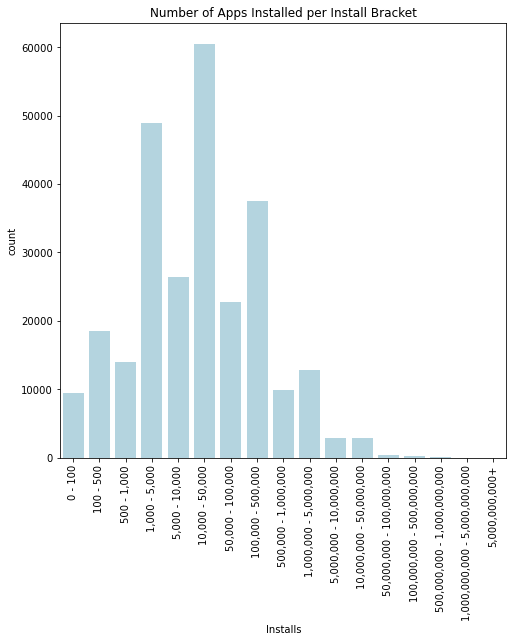

In [16]:
order = ['0 - 100','100 - 500', '500 - 1,000', '1,000 - 5,000', '5,000 - 10,000', '10,000 - 50,000', '50,000 - 100,000', '100,000 - 500,000', '500,000 - 1,000,000','1,000,000 - 5,000,000', '5,000,000 - 10,000,000', '10,000,000 - 50,000,000', '50,000,000 - 100,000,000','100,000,000 - 500,000,000', '500,000,000 - 1,000,000,000', '1,000,000,000 - 5,000,000,000', '5,000,000,000+']
plt.figure(figsize=(8,8))
a= sns.countplot(x = df.Installs, order = order, data = df, color = 'lightblue')
a.set_title('Number of Apps Installed per Install Bracket')
a.set_xticklabels(a.get_xticklabels(), rotation=90);

Number of Apps per category


EDUCATION              33394
GAME                   22508
TOOLS                  21591
BOOKS_AND_REFERENCE    21377
ENTERTAINMENT          20603
MUSIC_AND_AUDIO        17876
LIFESTYLE              15034
PERSONALIZATION        10544
FINANCE                10342
BUSINESS               10230
PRODUCTIVITY            9142
NEWS_AND_MAGAZINES      8029
HEALTH_AND_FITNESS      7537
PHOTOGRAPHY             7240
TRAVEL_AND_LOCAL        6650
SPORTS                  5585
COMMUNICATION           5486
SHOPPING                5337
SOCIAL                  4744
MAPS_AND_NAVIGATION     4094
MEDICAL                 3736
FOOD_AND_DRINK          3170
VIDEO_PLAYERS           2717
AUTO_AND_VEHICLES       2104
ART_AND_DESIGN          1758
WEATHER                 1643
BEAUTY                   959
HOUSE_AND_HOME           925
PARENTING                621
EVENTS                   615
LIBRARIES_AND_DEMO       611
COMICS                   505
DATING                   323
Name: Category, dtype: int64

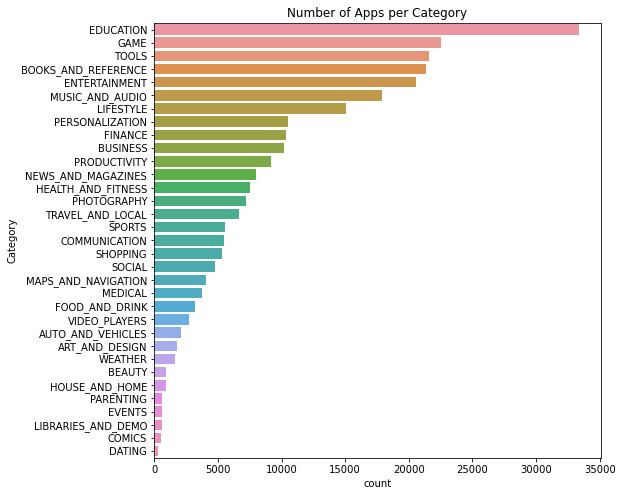

In [17]:
#Exploring the number of apps per category in the Google Playstore
print('Number of Apps per category')
display(df.Category.value_counts())
fig=plt.figure(figsize=(8, 8))
a = sns.countplot(y = df.Category,order = df.Category.value_counts().index, data = df).set_title('Number of Apps per Category')

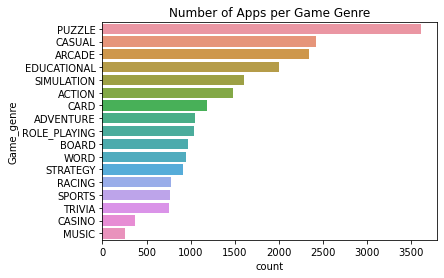

In [18]:
#Game is a unique category because it has genres associated with it. Lets visualize the breakdown of genres
b= sns.countplot(y = 'Game_genre', order = df.Game_genre.value_counts().index, data = df).set_title('Number of Apps per Game Genre')

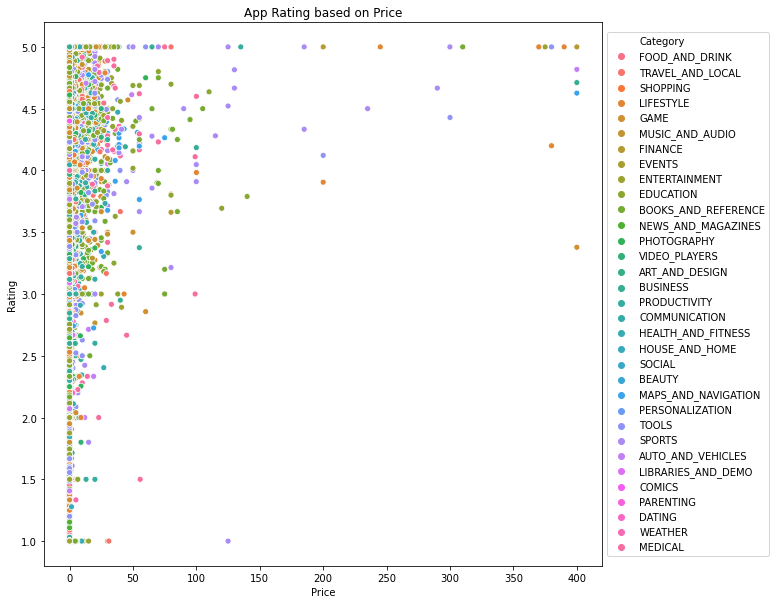

In [19]:
#Rating of Apps based on their Pricing Model
plt.figure(figsize=(10,10))
g = sns.scatterplot(y = 'Rating', x = 'Price',hue = 'Category', data = df)
g.set_title('App Rating based on Price')
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

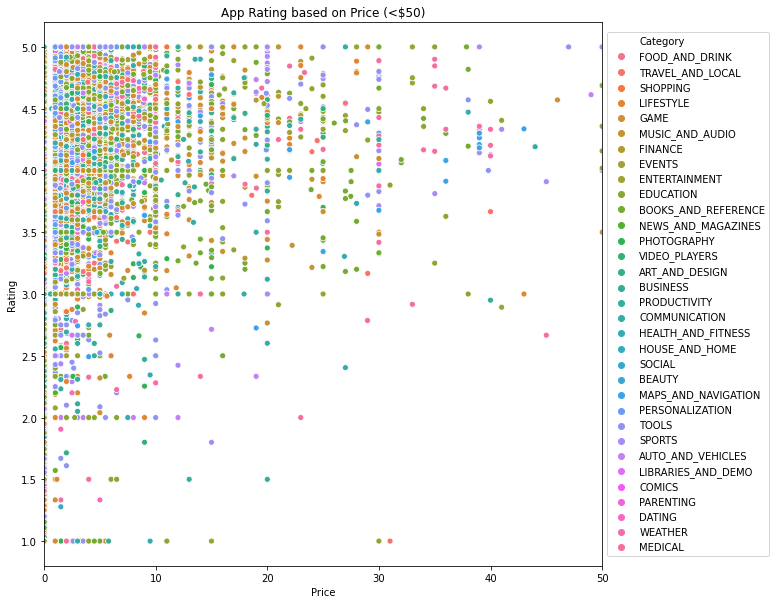

In [20]:
#Rating of Apps based on their Pricing Model (<$50)
plt.figure(figsize=(10,10))
g = sns.scatterplot(y = 'Rating', x = 'Price',hue = 'Category', data = df)
g.set_title('App Rating based on Price (<$50)')
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
g.set_xlim(0,50);

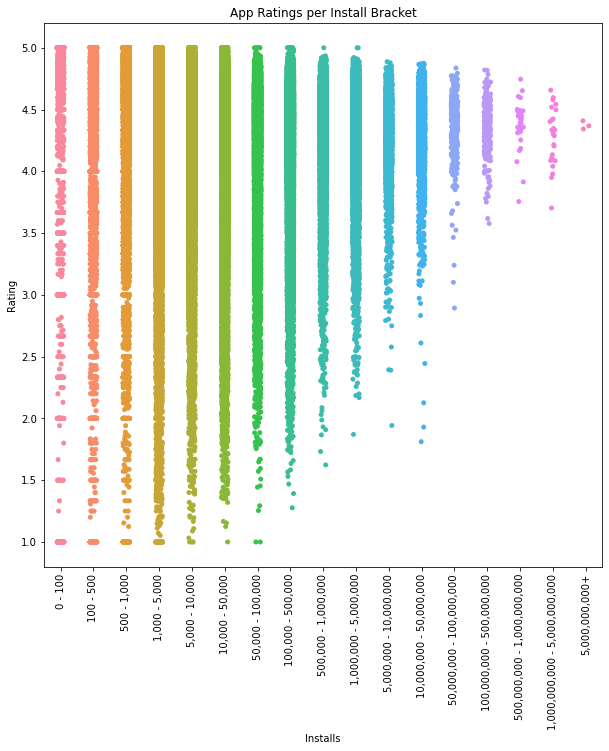

In [21]:
plt.figure(figsize = (10,10))
ax = sns.stripplot(x="Installs", y="Rating", data=df, order = order)
ax.set_title('App Ratings per Install Bracket')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

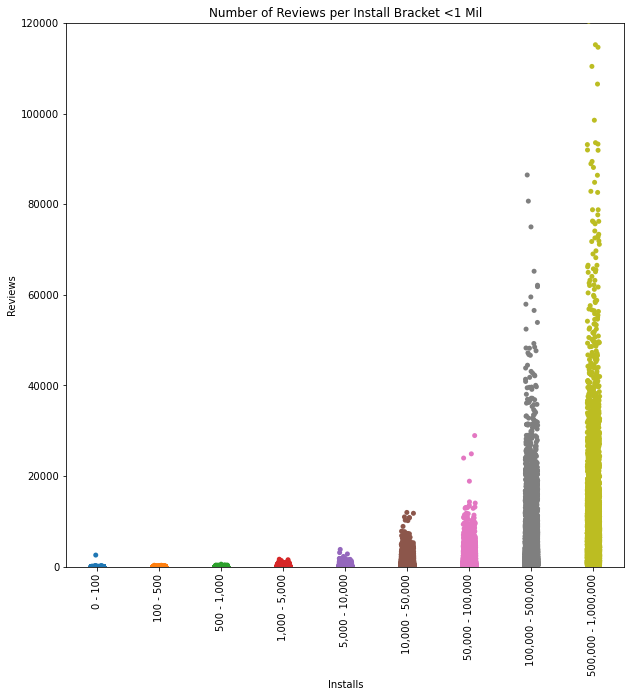

In [22]:
plt.figure(figsize = (10,10))
ax = sns.stripplot(x="Installs", y="Reviews", data=df[df['Installs'].isin(['0 - 100','100 - 500', '500 - 1,000', '1,000 - 5,000', '5,000 - 10,000', '10,000 - 50,000', '50,000 - 100,000', '100,000 - 500,000', '500,000 - 1,000,000'])], order = ['0 - 100','100 - 500', '500 - 1,000', '1,000 - 5,000', '5,000 - 10,000', '10,000 - 50,000', '50,000 - 100,000', '100,000 - 500,000', '500,000 - 1,000,000'])
ax.set_title('Number of Reviews per Install Bracket <1 Mil')
ax.set_ylim(0,120000)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

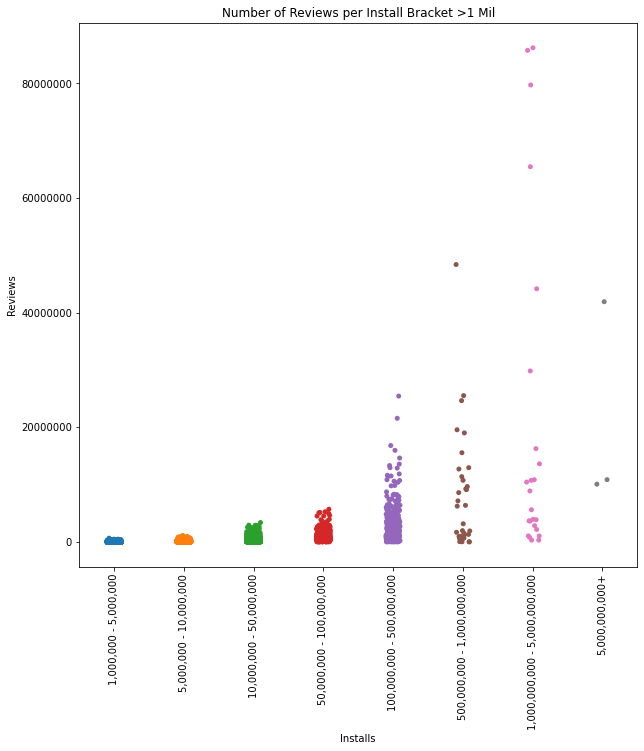

In [23]:
plt.figure(figsize = (10,10))
ax = sns.stripplot(x="Installs", y="Reviews", data=df[df['Installs'].isin(['1,000,000 - 5,000,000', '5,000,000 - 10,000,000', '10,000,000 - 50,000,000', '50,000,000 - 100,000,000','100,000,000 - 500,000,000', '500,000,000 - 1,000,000,000', '1,000,000,000 - 5,000,000,000', '5,000,000,000+'])], order = ['1,000,000 - 5,000,000', '5,000,000 - 10,000,000', '10,000,000 - 50,000,000', '50,000,000 - 100,000,000','100,000,000 - 500,000,000', '500,000,000 - 1,000,000,000', '1,000,000,000 - 5,000,000,000', '5,000,000,000+'])
ax.set_title('Number of Reviews per Install Bracket >1 Mil')
plt.ticklabel_format(style='plain', axis='y')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

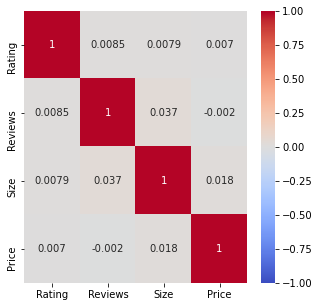

In [24]:
#Correlation matrix to check for multicollinearity - Entire Dataframe
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

Correlation for Top 5 Categories


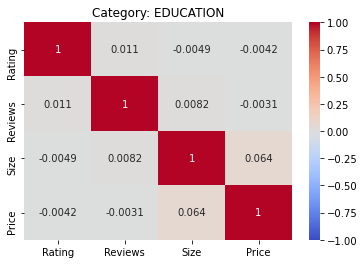

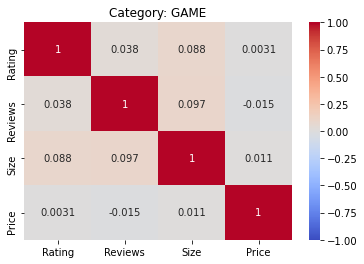

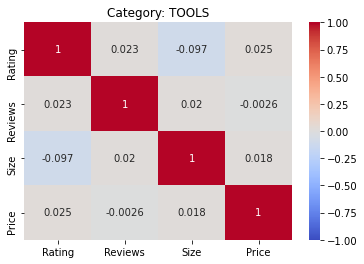

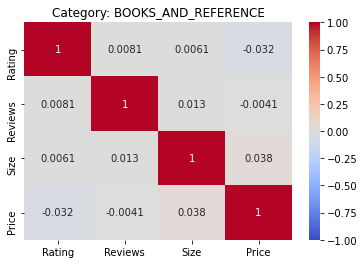

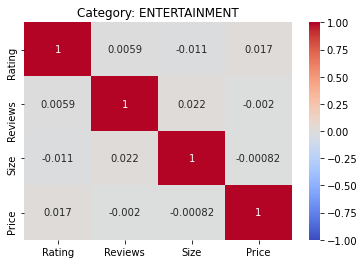

In [3]:
#Correlatioin matrix - Top 5 Categories
print('Correlation for Top 5 Categories')
a = df['Category'].value_counts().index.unique()
top_5 = a[:5]
for x in top_5:
    plt.figure()
    sns.heatmap(df[df['Category'] == x].corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True).set_title('Category: '+x)